##### ADS Midterm 2018

## Theoretic part

### Question 1. 
Imagine traninig a model which considers multiple sattelite images of urban traffic and tries to find groups of images which represent same locations. How would you classify this problem from Machine Learning perspective:

A. Supervised leanring;

B. Unsupervised learning;

C. Semi-supervised learning;

D. Reinforcement learning.

Explain you choice:


**Answer:** B. It is unsupervised learning as the training data does not contain the right answers regarding which images do actually represent similar locations - the approach needs to learn the similarities by itself.

### Question 2. 
Which of the following statements (select all that apply) are true about overfitting problem for linear regression:

A. Overfitting problem could happen if we do not have enough features but a big
number of observations.

B. Overfitting problem could happen when we have many noisy features but a
small number of observations.

C. Overfitting problem could be detected by R-squared if the in-sample R-squared
is very low.

D. Overfitting problem could be detected by R-squared if the out-of-sample R-
squared is very low.

E. Overfitting problem could be detected by R-squared if the out-of-sample R-
squared is considerably lower compared to in-sample R-squared.

Explain how do you understand the concept of overfitting in general and in the context of your answer.

**Answer:** B and E. Overfitting happens when the size of training data and the model complexity (e.g. number of features) are out of balance. When a model is too complex it can learn not only the major patterns, but also a number of occasional features being specific to the training set, which are not generalizeable, this way resulting in a strong in-sample performance and weak out-of-sample, i.e. OS R2 being much lower than IS R2.

## Question 3.

Assume you found that the output variable $y$ has a correlation of $40\%$ with the input variable $x_1$ and a negative correlation of $-30\%$ with the input variable $x_2$. Select all of the following statements (all that apply) which could be proven to be true:

A. Regression $y\sim a_1 x_1$ will have positive $a_1$;

B. Regression $y\sim a_1 x_1+a_2 x_2+a_0$ will have positive $a_1$ and negative $a_2$;

C. Regression $y\sim a_2 x_2$ will have $a_2=-0.3$;

D. Regression $y\sim a_2 x_2$ will have $a_2=-0.3$ if $x_2$ and $y$ were standardized;

E. Regression $y\sim a_1 x_1+a_2 x_2+a_0$ will have $a_1=0.4$ and $a_2=-0.3$ if $y,x_1,x_2$ were standardized.

F. Regression $y\sim a_1 x_1+a_2 x_2$ will have $a_0=0$, $a_1=0.4$ and $a_2=-0.3$ if $y,x_1,x_2$ were standardized and $x_1$ and $x_2$ were obtained as the two leading principal components from a set of other features.

**Hint:** recall one of the main properties of the principal components.

**Answer:** A) (While $a_1$ does not have to be the same as correlation coefficient unless $x$ and $y$ are standardized it has to be of the same sign), D) ($a_2$ equals to $corr(x_2,y)$ if $x_2,y$ are standardized), F) ($a_1,a_2$ are equal to the corresponding correlation coefficients when $y,x_1,x_2$ are standardized and $x_1,x_2$ are uncorrelated, which is the case for principal components)

## Question 4.

Regression $y\sim a_1 x_1 + a_2 x_2 +a_3 x_3$ have p-value of $0.04$ for $x_1$, $0.1$ for $x_2$ and $0.2$ for $x_3$. Does in mean that (select all that apply):

A. Impact of $x_3$ is twice stronger than impact of $x_2$.

B. Regressors $x_2$ and $x_3$ are irrelevant.

C. One could reject the null-hypothesis $a_j=0$ only for $j=1$ but not for $j=2$ and $j=3$ at 95% singificance level.

D. The estimated value of $a_1$ is statistically significant.

E. 95%-confidence indervals for $a_2$ and $a_3$ should contain zero. 

**Answer:** C,E. Note that $p-$values only concern rejecting the null hypothesis, they do not prove relevance, irrelevance, impact strength or true values. Also is p-value is higher than $\alpha$ then $1-\alpha$-confidence interval contains zero.

## Practice part
## Case I. Crime statistics

Crime Rate in 47 states of the USA with 13 explanatory variables  
The crime rate (**Y**) in 47 states in the U.S. was reported together with possible factors that might influence it. The factors recorded are as follows;  
X1 = the number of males aged 14 - 24 per 1000 of total state population  
X2 = binary variable distinguishing southern states (X2 =1) from the rest (X2=0).  
X3 = the mean number of years of schooling x 10 of the population, 25 years old and over  
X4 = police expenditure (in dollars) per person by state and local government in 1960  
X5 = police expenditure (in dollars) per person by state and local government in 1959  
X6 = labour force participation rate per 1000 civilian urban males in the age group 14-24  
X7 = the number of males per 1000 females  
X8 = state population size in hundred thousands  
X9 = unemployment rate of urban males per 1000 in the age group 14-24    
X10 = unemployment rate of urban males per 1000 in the age group 35-59.  
X11 = the median value of family income or transferable goods and assets (unit 10 dollars)  
X12 = the number of families per 1000 earning below one-half of the median income.  

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 6]

/Users/jaime/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/jaime/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_excel('Crime.xlsx')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Y
0,151,1,91,58,56,510,950,33,108,41,394,261,79.1
1,143,0,113,103,95,583,1012,13,96,36,557,194,163.5
2,142,1,89,45,44,533,969,18,94,33,318,250,57.8
3,136,0,121,149,141,577,994,157,102,39,673,167,196.9
4,141,0,121,109,101,591,985,18,91,20,578,174,123.4


### Q1. Report the correlation coefficients between each feature and the output variable Y (crimes per 100)
Please use a loop

In [3]:
for i in range(1,13):
    print('corr(Y,X%d)=%f' % (i,np.corrcoef(data.Y,data['X%d' % i])[0,1]))

corr(Y,X1)=-0.089472
corr(Y,X2)=-0.090637
corr(Y,X3)=0.322835
corr(Y,X4)=0.687604
corr(Y,X5)=0.666714
corr(Y,X6)=0.188866
corr(Y,X7)=0.213914
corr(Y,X8)=0.337474
corr(Y,X9)=-0.050478
corr(Y,X10)=0.177321
corr(Y,X11)=0.441320
corr(Y,X12)=-0.179024


### Q2. Look at the impact of each feature separately (on all 47 observations)
    Fit bi-variate regressions and report the estimate as well as the p-values. Please use a loop

In [4]:
for i in range(1,13):
    lm = smf.ols(formula='Y ~ X%d' % i, data = data).fit()
    print('X%d: R2=%f, p-value=%f, model: Y~%f*X%d+%f' % (i,lm.rsquared,lm.pvalues[1],lm.params[1],i,lm.params[0]))

X1: R2=0.008005, p-value=0.549789, model: Y~-0.275347*X1+128.664557
X2: R2=0.008215, p-value=0.544586, model: Y~-7.318750*X2+93.000000
X3: R2=0.104222, p-value=0.026878, model: Y~1.116121*X3+-27.396654
X4: R2=0.472800, p-value=0.000000, model: Y~0.894848*X4+14.446398
X5: R2=0.444508, p-value=0.000000, model: Y~0.922203*X5+16.516424
X6: R2=0.035670, p-value=0.203581, model: Y~0.180755*X6+-10.929773
X7: R2=0.045759, p-value=0.148794, model: Y~0.280765*X7+-185.489484
X8: R2=0.113889, p-value=0.020351, model: Y~0.342838*X8+77.954816
X9: R2=0.002548, p-value=0.736150, model: Y~-0.108288*X9+100.846541
X10: R2=0.031443, p-value=0.233108, model: Y~0.812047*X10+62.916195
X11: R2=0.194763, p-value=0.001902, model: Y~0.176893*X11+-2.428261
X12: R2=0.032049, p-value=0.228577, model: Y~-0.173550*X12+124.177253


### Q3. Take for the further consideration only those which regressors have correlation coefficient with Y above 30%. Fit the multi-variate regression with them, report statistics

In [5]:
lm = smf.ols(formula='Y ~ X3+X4+X5+X8+X11', data = data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     9.411
Date:                Tue, 20 Nov 2018   Prob (F-statistic):           4.96e-06
Time:                        23:05:33   Log-Likelihood:                -220.02
No. Observations:                  47   AIC:                             452.0
Df Residuals:                      41   BIC:                             463.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9177     42.504      0.092      0.9

### Q4. Visualize the model fit (true values as X against the predicted values as Y together with the equality line)

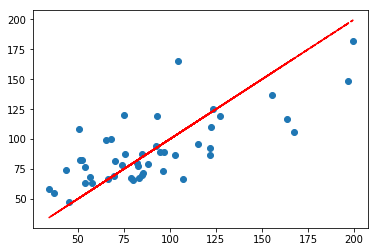

In [6]:
plt.scatter(data.Y,lm.predict(data))
plt.plot(data.Y, data.Y, 'r--')

### Q5. Run cross-validation with the regressors in Q3, report the Out-of-sample R2 (OS R2)
    1. Put 50% observations on average into training set and the remaining 50% into test set
    2. Run it 1000 times, obtain the average value

In [7]:
# Using cross validation.
R_IS=[]
R_OS=[]

# Why we need this? let's set n=1 and run several times to see.
n=1000

for i in range(n):
    train, test = train_test_split(data, test_size = 0.50)
    lm = smf.ols(formula='Y ~ X3+X4+X5+X8+X11',data=train).fit()
    R_IS.append(lm.rsquared)
    lmy = lm.predict(test)
    y_err = lmy - test.Y
    y_norm = test.Y-np.mean(test.Y)
    R2 = 1-y_err.dot(y_err)/y_norm.dot(y_norm)
    R_OS.append(R2)
print("IS R^2 for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

IS R^2 for 1000 times is 0.6015580655738203
OS R-squared for 1000 times is 0.07576480007732798


## Q5. Apply regularization
Try Ridge regression for the regularization parameter $\alpha=e^{-5,-4...,9,10}$. For each value of $\alpha$ perform cross-validation with 1000 iterations of 50-50 split and report the average out-of-sample R2. Make sure to standardize the regressors first (this is essential for regularization to have regressors on the same scale).

In [8]:
from sklearn.linear_model import Ridge, Lasso

In [9]:
X, y = data.loc[:, ['X3', 'X4', 'X5', 'X8', 'X11']], data.loc[:, 'Y']

In [10]:
scaler = preprocessing.StandardScaler().fit(X)
X=scaler.transform(X)  

/Users/jaime/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jaime/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [11]:
# Ridge
# Using cross validation.
R_IS=[]
R_OS=[]

# Why we need this? let's set n=1 and run several times to see.
n=1000
for a in [np.exp(i) for i in range(-5, 10)]:
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
        rr = Ridge(alpha=a)
        rr.fit(X_train, y_train)
        R_IS.append(rr.score(X_train, y_train))
        R_OS.append(rr.score(X_test, y_test))
    print("IS R^2 with alpha = {} for {} times is {}".format(a, n,np.mean(R_IS)))
    print("OS R-squared with alpha = {} for {} times is {}".format(a, n,np.mean(R_OS)))

IS R^2 with alpha = 0.006737946999085467 for 1000 times is 0.5927193680879527
OS R-squared with alpha = 0.006737946999085467 for 1000 times is 0.1015834934270334
IS R^2 with alpha = 0.01831563888873418 for 1000 times is 0.594086984847638
OS R-squared with alpha = 0.01831563888873418 for 1000 times is 0.10261824089615733
IS R^2 with alpha = 0.049787068367863944 for 1000 times is 0.596736036089061
OS R-squared with alpha = 0.049787068367863944 for 1000 times is 0.10251962472278014
IS R^2 with alpha = 0.1353352832366127 for 1000 times is 0.5939755234543139
OS R-squared with alpha = 0.1353352832366127 for 1000 times is 0.11157871011266776
IS R^2 with alpha = 0.36787944117144233 for 1000 times is 0.591435586893681
OS R-squared with alpha = 0.36787944117144233 for 1000 times is 0.11547695649002089
IS R^2 with alpha = 1.0 for 1000 times is 0.5861412255150417
OS R-squared with alpha = 1.0 for 1000 times is 0.12430015102977524
IS R^2 with alpha = 2.718281828459045 for 1000 times is 0.5791633307

## Case II. Cluster the countries of the world by socio-economic profiles


This dataset contains various socio-economic statistics of the world countries like 'Population', 'Area_sqmi', 'Birthrate', 'Deathrate', 'GDP_percapita' etc. The aim of this exercise is to discover clusters of the countries of similar socio-economic profile and find the outliers

In [2]:
# Importing the countries dataset and shapefile
import geopandas as gpd
world = gpd.read_file('World_Countries.shp')
countries = pd.read_csv("countries.csv")
countries.head()

,COUNTRY,Region,Population,Area_sqmi,Pop_Density,Coastline_area_ratio,Net_migration,InfantMortality_per1000,GDP_percapita,Literacy_percent,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


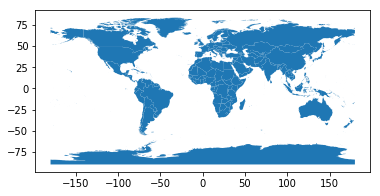

In [3]:
world.plot()

### Q1. Cleaning: Clean the column 'COUNTRY' and deal with missing values
    1. Remove white-spaces from the data in column 'COUNTRY'
    2. Fill all missing values in dataset with 0
    3. Standardize the features (all columns other than County and Region; since the clusters use Euclidean distance, bringing features on the same scale is important (e.g. GDP and Climate are fully incomparable;  it is the best practice to standardise the features before using KMeans in such a case)

In [4]:
# Remove white-spaces
countries['COUNTRY'] = countries['COUNTRY'].str.strip()
# Fill missing values
countries = countries.fillna(0)
X=countries.drop(['COUNTRY','Region'], axis=1)
scaler = preprocessing.StandardScaler().fit(X)
X=scaler.transform(X)

/Users/jaime/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jaime/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


### Q2. Clusters the countries using KMeans and Gausian Mixture model (K=2,3 clusters). Visualize the results

In [5]:
from sklearn.cluster import KMeans

In [6]:
km=KMeans(random_state=999,n_clusters=3,n_init=100)
res=km.fit(X) 
countries['km_y']=res.labels_

In [9]:
type(countries['km_y'][0])

numpy.int32

In [7]:
countries

,COUNTRY,Region,Population,Area_sqmi,Pop_Density,Coastline_area_ratio,Net_migration,InfantMortality_per1000,GDP_percapita,Literacy_percent,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,km_y
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,2
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,1
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,1
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000,1
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000,0
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,...,2.41,0.24,97.35,0.0,45.11,24.20,0.096,0.658,0.246,2
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,...,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780,0
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,...,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743,0
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,...,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547,1
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,...,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418,1


Text(0.5,1,'KMeans')

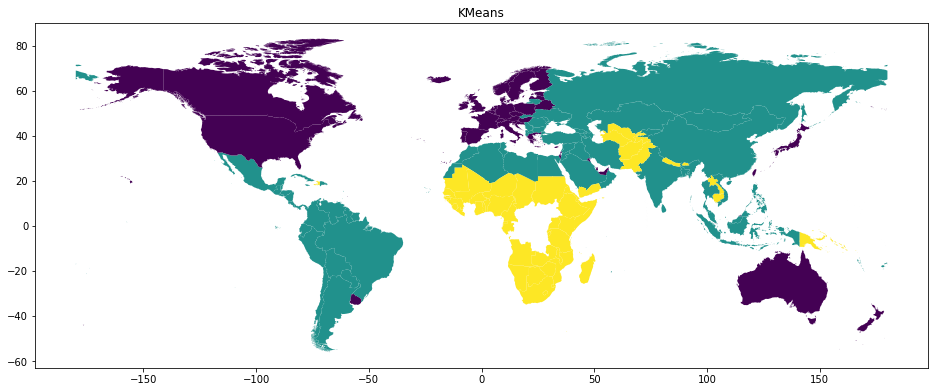

In [8]:
pred_world = world.merge(countries, on='COUNTRY')
pred_world.plot(column = 'km_y', figsize=(16, 12))
plt.title("KMeans")

In [18]:
from sklearn.mixture import GaussianMixture

In [19]:
gm=GaussianMixture(random_state=999,n_components=3,n_init=100)
res=gm.fit(X) 
countries['gm_y']=res.predict(X)

Text(0.5,1,'Gaussian Mixture')

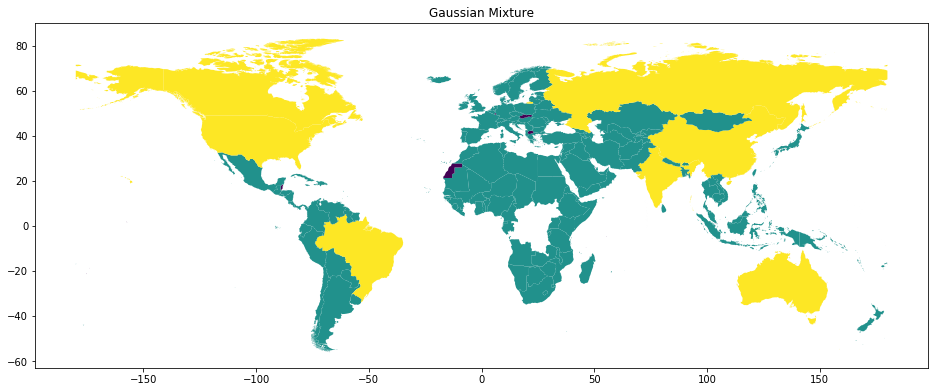

In [20]:
pred_world = world.merge(countries, on='COUNTRY')
pred_world.plot(column = 'gm_y', figsize=(16, 12))
plt.title("Gaussian Mixture")

### Q3. Use average silhuette to find the best number of clusters for K-means and Gausian Mixture (try K=2,3...,10).

### Q.4 Transform all standardized features using PCA into two leading principal components and visualize the countries as points on a scatter plot it 2D space of the leading PCs
Annotate the data points which appear as outliers with the respective county names

    Hint: take the points which 

In [21]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import RobustScaler

RobustScaler()

def add_cluster(data, clusters, cluster_option='KMeans'):
    """Creates clusters based on the given data
    
    1. Normalize the data using RobustScaler() before fitting KMeans clustering model
    ** A new variable should be used to store the scaled dataset so that 'Predicted clusters'
    can be added to the original dataframe **
    
    2. Keep random_state=111 to make the results consistent
    
    Parameters:
        data : 'countries' dataset containing only the required columns
        clusters : no. of clusters to be made
        cluster_option : Model to be used for clustering (default=KMeans)
    
    Returns:
        data : original dataset with an added column containing the Cluster labels
    """
    # Normalizing the features
    scaler_x = RobustScaler().fit(data.drop(['COUNTRY'], axis=1))
    scaled_train = scaler_x.transform(data.drop(['COUNTRY'], axis=1))
    
    if cluster_option == 'KMeans':
        # Predict clusters using KMeans clustering algorithm
        km=KMeans(random_state=999,n_clusters=clusters)
        res=km.fit(scaled_train) 
        data['y_t']=res.labels_
    
    if cluster_option == 'GaussianMixture':
        gm=GaussianMixture(random_state=999,n_components=clusters)
        res=gm.fit(scaled_train) 
        data['y_t']=res.predict(scaled_train)
        
    silhouette_avg = silhouette_score(scaled_train, data['y_t'])
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))
    
    return data

In [22]:
range_n_clusters = np.arange(2, 11, 1)
for n_clusters in range_n_clusters: #try different numbers of clusters
    #X = add_cluster(countries.loc[:, ['COUNTRY', 'GDP_percapita', 'Literacy_percent']], n_clusters)
    X = add_cluster(countries.drop(['Region'], axis=1), n_clusters) # Dropping 'Region' column as it contained text

For n_clusters =2, the average silhouette_score is :0.8881814303855778
For n_clusters =3, the average silhouette_score is :0.8579164516475398
For n_clusters =4, the average silhouette_score is :0.8596805526859856
For n_clusters =5, the average silhouette_score is :0.6990574758475171
For n_clusters =6, the average silhouette_score is :0.6961925078341679
For n_clusters =7, the average silhouette_score is :0.6713985527711769
For n_clusters =8, the average silhouette_score is :0.3288781420746521
For n_clusters =9, the average silhouette_score is :0.20461046911412442
For n_clusters =10, the average silhouette_score is :0.16949161766864065


In [23]:
range_n_clusters = np.arange(2, 11, 1)
for n_clusters in range_n_clusters: #try different numbers of clusters
    X = add_cluster(countries.drop(columns=['Region'], axis=1), n_clusters, 
                    cluster_option='GaussianMixture') # Dropping 'Region' column as it contained text

For n_clusters =2, the average silhouette_score is :0.8417375463385116
For n_clusters =3, the average silhouette_score is :0.8407366410959203
For n_clusters =4, the average silhouette_score is :0.6637815830811373
For n_clusters =5, the average silhouette_score is :0.6761778115577403
For n_clusters =6, the average silhouette_score is :0.6961925078341679
For n_clusters =7, the average silhouette_score is :0.6713985527711769
For n_clusters =8, the average silhouette_score is :0.30704543147332797
For n_clusters =9, the average silhouette_score is :0.1765011923667079
For n_clusters =10, the average silhouette_score is :0.1451818659167568


In [24]:
pca = PCA(n_components = 2)
pca.fit(X.drop(['COUNTRY'], axis=1))
x = pca.transform(X.drop(['COUNTRY'], axis=1))

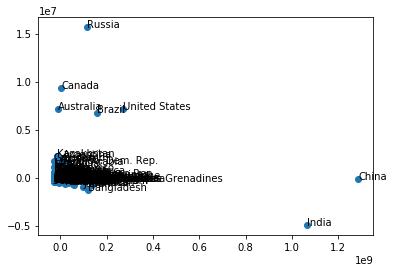

In [ ]:
plt.scatter(x[:,0], x[:,1])
for i in range(len(countries)):
    if x[i,1] <-3 or x[i,1] > 6 or x[i,0] > 5 or x[i,0]<-3.5:
        plt.annotate(s=countries.COUNTRY[i], xy=(x[i,0], x[i,1]))

#  Part III. Reconstructing faces using PCA

This dataset is made up of images containing faces of celebrities and world leaders. Since an image is a 2-D array (eg - 62 x 47 pixels) where each pixel is a feature, there will be large number of features (eg - 2914 features) making it difficult for the model to train quickly and predict accurately. In such cases, PCA comes to the rescue where the Principal components can capture large amount of information without using too many features. This can come in handy while building models for CCTV surveillance, pedestrian counting, public safety etc. 
<br><br>
Total images : 1288<br>
Image size : 62 x 47<br>
Total features : 2914<br><br>
To make it easy to use, the image has been flattened to a 1-D array containing all the features (or pixels). All computations can be done on the flattened image but only for displaying the image, it has to be reshaped to the original dimensions (height, width)

## Loading and viewing dataset

In [ ]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70)
n_samples, height, width = lfw_people.images.shape
npix = height*width
fea = lfw_people.data

print ("Totoal images:", len(fea))
print ("Totoal features:", npix)
print ("\nHeight:", height, "\nWidth:", width)

def plt_face(x):
    #print "Inside plt_face()"
    #global h,w
    plt.imshow(x.reshape((height, width)), cmap=plt.cm.gray)
    plt.xticks([])
    
n = 5
for i in range(n):
    plt.figure(figsize=(10, 20))
    plt.subplot(1,n,i+1)
    plt_face(fea[i])
    plt.show()

## Helper Functions

*** 1/3 Computes the Mean of all images, returns it as 'M' ***

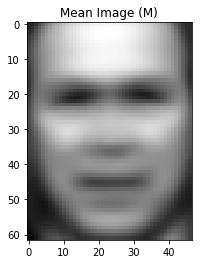

In [4]:
def mean_image(fea):
    """Computes mean for each pixel in the image frame
    
    Parameters:
        fea : Feature vector containing of all images
    
    Returns:
        new_img : Mean Image
    """
    rows, cols = fea.shape
    new_img = np.zeros(cols)
    for i in range(cols):
        mean = fea[:,i].mean()
        new_img[i] = mean
        
    return new_img

M = mean_image(fea)

plt.title ("Mean Image (M)")
plt.imshow(M.reshape(height, width), cmap = 'gray')

*** 2/3 Displays the image from Principal components ***

Reconstructing original image using equation : $ \bf{X = W^T \cdot Z + M} $

In [5]:
def display_image_from_pca(Z, pca, fea, image_no=4):
    """Display an image from the Transformed data, PCA model and features along with the original image
    
    Parameters:
        Z : Transormed data after using PCA
        pca : PCA model used to transform the data
        fea : All images
        image_no : Image no. to be displayed
    
    Returns:
        Displays the reconstructed image and original image
        
    The columns of W are the eigenvectors of the covariance matrix of X
    The columns of Z correspond to attributes associated with largest eigen value
    """
    # Fetching eigenvectors and the transformed data
    W = pca.components_     
    # Applying reconstruction equation on the values obtained
    X = ( W.transpose().dot(Z[image_no]) + mean_image(fea) ).reshape( (height,width) )
    
    # Displaying the images
    plt.subplot(1, 2, 1)
    plt.title("Reconstructed Image")
    plt.imshow(X, cmap = 'gray')
    
    plt.subplot(1, 2, 2)
    plt.title("Original Image")
    plt.imshow(fea[image_no].reshape(height, width), cmap = 'gray')
    plt.show()

*** 3/3 Makes dataframe containing images, names and target_no for simplicity of use afterwards ***

In [6]:
target_names = lfw_people.target_names
#true_names = []
ls = []
for i in range(len(fea)):
    target_no = lfw_people.target[i]
    true_name = target_names[target_no].rsplit(' ', 1)[-1]
    ls.append([fea[i], true_name, target_no])
    
df = pd.DataFrame(ls, columns=['Image', 'True_Name', 'Target_Number'])
df.head()

,Image,True_Name,Target_Number
0,"[253.66667, 254.33333, 253.66667, 250.66667, 2...",Chavez,5
1,"[38.333332, 43.0, 53.0, 41.0, 51.0, 89.0, 113....",Blair,6
2,"[88.0, 92.666664, 112.666664, 129.0, 141.33333...",Bush,3
3,"[13.333333, 7.3333335, 6.3333335, 7.6666665, 5...",Powell,1
4,"[123.666664, 121.0, 123.0, 129.0, 130.33333, 1...",Sharon,0


### Q1. Fit a PCA model and return the transformed data
    Hint: Use numpy array - 'fea' (contains feature vector of all the images) for fitting PCA model

In [7]:
import sklearn.decomposition as skd

def pca_module(fea, n):
    """Fit the PCA model with the specified no. of components, transform the data and return data along with the model
    
    Parameters:
        fea : Feature vector containing all images
        n : No. of components
    
    Returns:
        Z : Principal Components
        pca : Fitted PCA model
    """
    # Fitting PCA model
    pca = skd.PCA(n_components = n)
    skd.PCA.fit(pca,fea)
    Z = pca.transform(fea)
    
    return Z, pca

Z, pca = pca_module(fea, 10)

### Q2. Visualize all the images in the space of the first two Principal components
    Make a scatter plot, where images are represented as dots

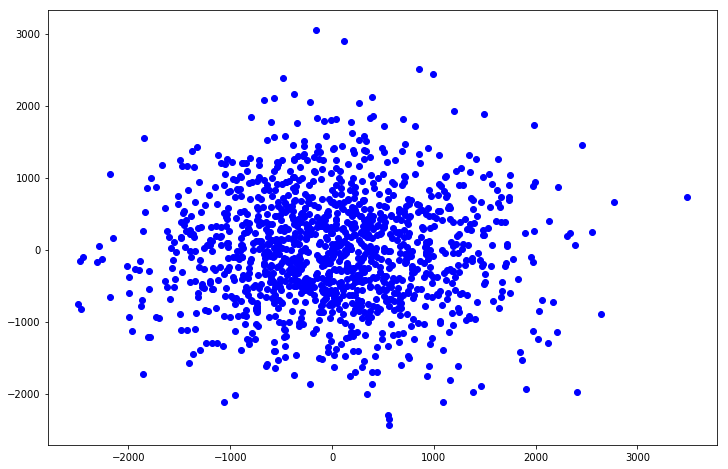

In [34]:
PC1=0; PC2=1;

plt.figure(figsize=(12, 8))

plt.plot(Z[:,PC1], Z[:,PC2], 'o', c='blue')
plt.show()

## Q3. Visualize Bush vs Powell in the space of 1st and 6th components

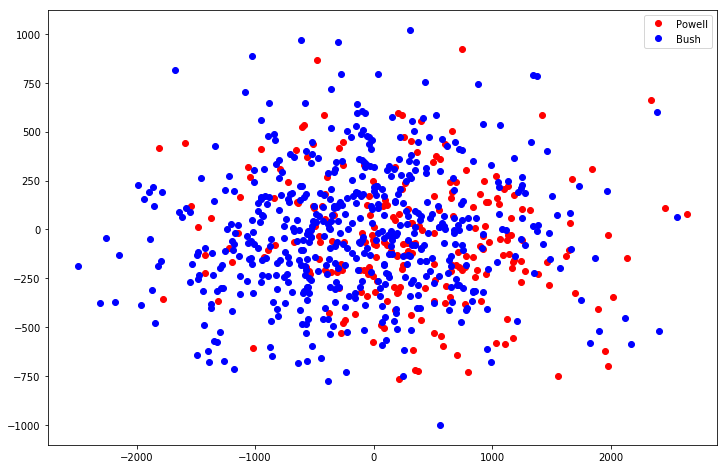

In [40]:
name = ["Powell", "Bush"]
colors=["red","blue"]
#PC1=5; PC2=6;
PC1=0; PC2=6;

plt.figure(figsize=(12, 8))

for i in range(len(name)):
        plt.plot(Z[df['True_Name']==name[i],PC1], Z[df['True_Name']==name[i],PC2], 'o', c=colors[i], label=name[i])
plt.legend(name)
plt.show()

### Q3.  Reconstructing original image

Display any reconstructed image by passing the PCA model, transformed data, images and a particular image_no to 'display_image_from_pca' function which will display the reconstructed and original image side-by-side in the same plot. Use first 6,50 and 200 components

### 6 components

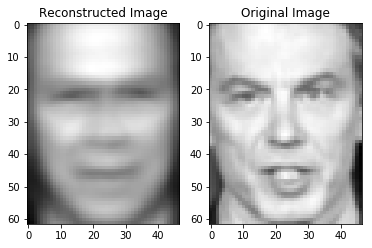

In [44]:
# Getting W and Z from the pca function
Z, pca = pca_module(fea, 6)
# Call the helper function to display image
display_image_from_pca(Z, pca, fea, image_no=24)

### 50 components

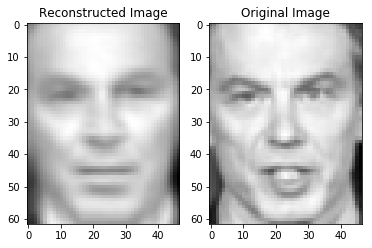

In [45]:
# Getting W and Z from the pca function
Z, pca = pca_module(fea, 50)
# Call the helper function to display image
display_image_from_pca(Z, pca, fea, image_no=24)

### 200 components

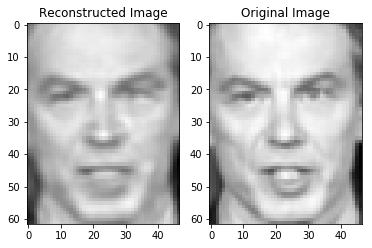

In [46]:
# Getting W and Z from the pca function
Z, pca = pca_module(fea, 200)
# Call the helper function to display image
display_image_from_pca(Z, pca, fea, image_no=24)